**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 6: Principal Component Analysis (PCA) and visualization of multivariate data


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from numpy import linalg as LA
import seaborn as sns
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('New_York_Neighborhoods.xlsx')

In [3]:
data.head()

,Neighborhood,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife,Rank,Borough
0,Park Slope,73,76,77,82,83,81,73,83,81,84,77,87,1,Brooklyn
1,Lower East Side,73,82,83,75,83,76,78,84,72,76,73,92,2,Manhattan
2,Sunnyside,83,76,77,81,73,80,90,72,72,67,72,73,3,Queens
3,Cobble Hill & Boerum Hill,73,77,83,76,87,77,71,81,83,82,76,84,4,Brooklyn
4,Greenpoint,77,76,75,78,81,92,74,78,80,72,70,87,5,Brooklyn


In [4]:
df = data.iloc[:, 1:13]
df_cols=df.columns

In [5]:
df.tail()

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
45,74,81,77,63,68,70,79,78,66,77,71,68
46,71,79,67,80,62,69,83,70,77,84,78,65
47,89,71,64,67,62,71,76,67,60,70,73,65
48,90,63,66,75,65,66,79,63,67,65,74,65
49,76,78,73,62,70,63,75,75,73,75,71,79


### Normalizing

In [6]:
def standardize(df2):
    scaler=StandardScaler()
    scaler.fit(df2)
    df2=scaler.transform(df2)
    return df2


In [7]:
df=pd.DataFrame(standardize(df),columns=df_cols)
cols=[]
for i in range(1,13):
    cols.append('PC{}'.format(i))
df.tail()

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
45,0.058376,0.460124,0.095132,-1.719332,-0.979286,-0.731168,0.563159,0.217039,-1.338694,0.156967,-1.009883,-0.933213
46,-0.206971,0.241017,-1.226141,0.458659,-1.664102,-0.857667,1.149783,-0.780840,0.148744,1.278157,0.641795,-1.267298
47,1.385112,-0.635409,-1.622523,-1.206863,-1.664102,-0.604668,0.123191,-1.155045,-2.150023,-0.964224,-0.537975,-1.267298
48,1.473561,-1.511835,-1.358268,-0.181926,-1.321694,-1.237166,0.563159,-1.653984,-1.203472,-1.765074,-0.302021,-1.267298
49,0.235274,0.131464,-0.433377,-1.847449,-0.751014,-1.616665,-0.023465,-0.157166,-0.392143,-0.163373,-1.009883,0.291768


# Q1 Pearson correlation matrix

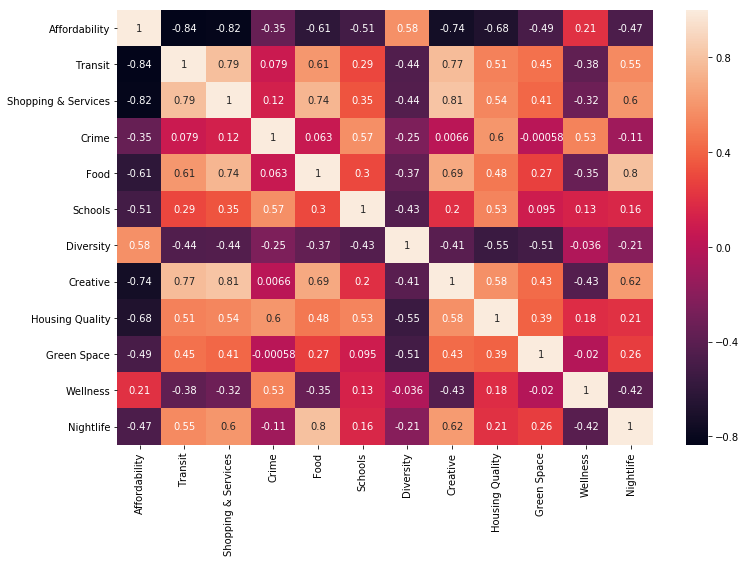

In [8]:
C=pd.DataFrame(df).corr()
W,V=LA.eig(C)
plt.figure(figsize=[12,8])
sns.heatmap(C, annot=True)

**The correlation matrix shows how a few attributes can be used to determine the rest. Like if the correlation between two features is high then we can express one in terms of another and hence, can reduce the dimension required to correctly represent the data.**

# Q2

### Performing PCA

In [9]:
pca = PCA(n_components=12)
pca=pca.fit(df)
df_pca=pca.transform(df)
df_new=pca.inverse_transform(df_pca)

## Q2  a)    Percentage variance explained by each principal component

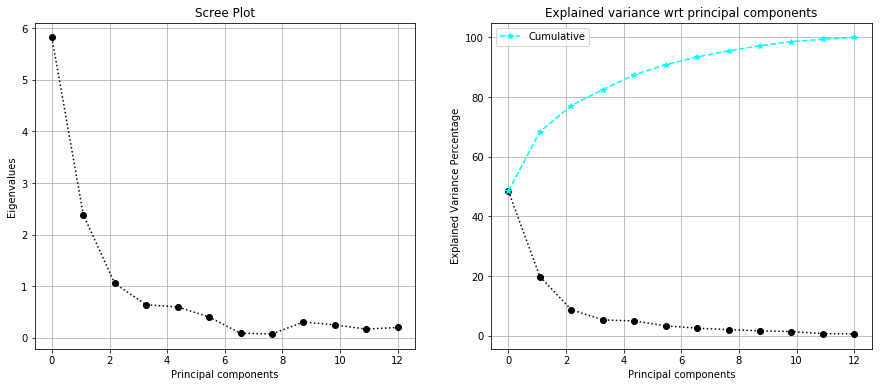

In [10]:
fig,axes = plt.subplots(1,2,figsize=[15,6])
axes[0].plot(np.linspace(0,pca.n_components_,pca.n_components_),W,':o',color='k')
axes[0].set_xlabel('Principal components')
axes[0].set_ylabel('Eigenvalues')
axes[0].set_title('Scree Plot')
axes[0].grid(True)
#ref: https://blogs.sas.com/content/iml/2019/11/04/interpret-graphs-principal-components.html


axes[1].plot(np.linspace(0,pca.n_components_,pca.n_components_),pca.explained_variance_ratio_*100,':o',color='k')
axes[1].plot(np.linspace(0,pca.n_components_,pca.n_components_),np.cumsum(pca.explained_variance_ratio_*100),'--*',label='Cumulative',color='cyan')
axes[1].set_xlabel('Principal components')
axes[1].set_ylabel('Explained Variance Percentage')
axes[1].set_title('Explained variance wrt principal components')
axes[1].legend()
axes[1].grid(True)


**We can see from the plots that more than 60% of the variance is explained by only 2 Principal components hence, we can use these two components to explain the features in transformed planes.**

## Q2 b)   Scatter plot each samples with x & y axis as PC1 and PC2

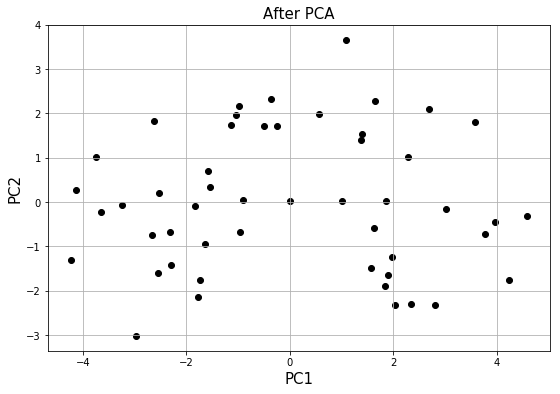

In [11]:
plt.figure(figsize=[9,6])
plt.scatter(df_pca[:,0], df_pca[:,1], c='k')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title('After PCA',fontsize=15)
plt.grid(True)



**This plot shows how the observations/samples are transformed after performing PCA.**

## Q2 c) Graph the variables as unit vector using their projection values on PC1 and PC2.

In [12]:
def loading_plot(df4,comp,labels):
    #df4 representa the data
    #comp represents the components
    
    clr=mcolors.CSS4_COLORS
    color=[clr['teal'],clr['magenta'],clr['olive'],clr['slategray'],
           clr['cyan'],clr['gold'],clr['red'],clr['darkorange'],clr['lime'], clr['green'],clr['blue'],clr['black']]
    
    xs = df4[:,0]
    ys = df4[:,1]
    n = comp.shape[0]
    

    plt.figure(figsize=[9,6])
    for i in range(n):
        scale_var = 1.0/np.sqrt((comp[i,0]*comp[i,0] + comp[i,1]*comp[i,1]))
        plt.arrow(0, 0, comp[i,0]*scale_var, comp[i,1]*scale_var,color = color[i], 
                  head_width=0.05,length_includes_head=True)
        plt.text(comp[i,0]*scale_var, comp[i,1]*scale_var, labels[i], color = color[i], ha = 'left', va = 'bottom',fontsize=12)
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.xlabel("PC1",fontsize=15)
    plt.ylabel("PC2",fontsize=15)
    plt.title('Variables as unit vectors',fontsize=15)
    plt.grid()


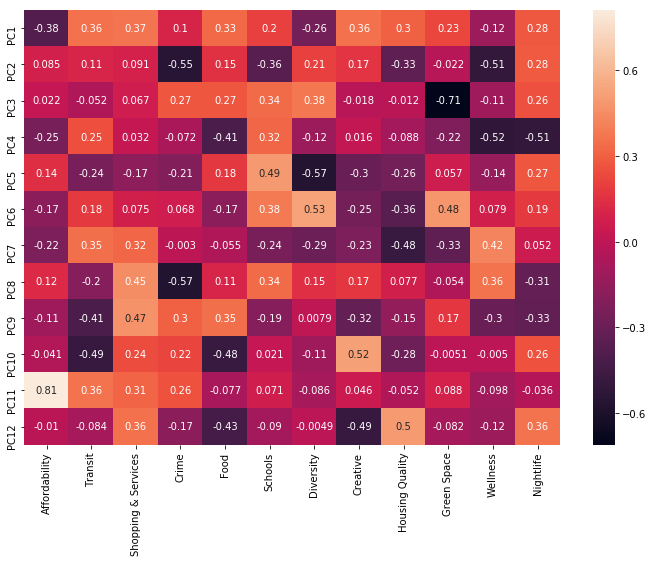

In [13]:
CC1=pd.DataFrame(pca.components_,cols,df_cols)
plt.figure(figsize=[12,8])
sns.heatmap(CC1,annot=True)


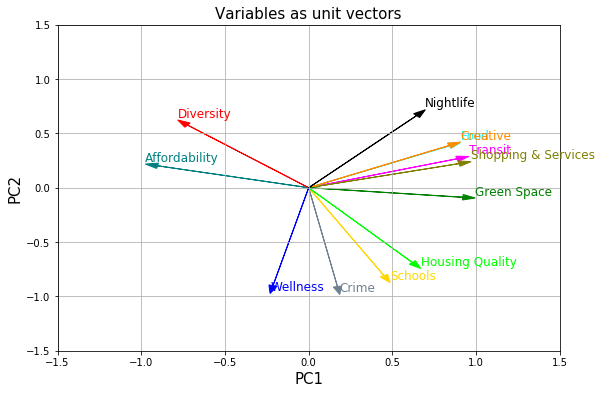

In [14]:
loading_plot(df_pca[:,0:2],np.transpose(pca.components_[0:2, :]),df_cols)

## Q2 d) Biplot both individuals/observations and the variables.

In [15]:
def biplot(df5,comp,labels,ylim,ylim2,xlim=None):
    clr=mcolors.CSS4_COLORS
    xs = df5[:,0]
    ys = df5[:,1]
    n = comp.shape[0]
    color=[clr['teal'],clr['magenta'],clr['olive'],clr['slategray'],
           clr['cyan'],clr['gold'],clr['red'],clr['darkorange'],clr['lime'], clr['green'],clr['blue'],clr['black']]

    
    fig,ax = plt.subplots(figsize=[9,6])
    ax.scatter(xs,ys)
    ax.set_ylabel('PC2 for individuals',fontsize=15)
    ax.set_ylim(-ylim,ylim)
    ax2=ax.twinx()
    for i in range(n):
        scale_var = 1.0/np.sqrt((comp[i,0]*comp[i,0] + comp[i,1]*comp[i,1]))
        ax2.arrow(0, 0, comp[i,0]*scale_var, comp[i,1]*scale_var,color = color[i],
                  head_width=0.05,length_includes_head=True)
        ax2.text(comp[i,0]*scale_var, comp[i,1]*scale_var, labels[i], color = color[i], ha = 'left', va = 'bottom',fontsize=12)
    if xlim!=None:
        ax.set_xlim(-xlim,xlim)
    ax.set_xlabel("PC1",fontsize=15)
    ax2.set_ylabel("PC2 for vectors",fontsize=15)
    ax2.set_ylim(-ylim2,ylim2)
    plt.title('Biplot',fontsize=15)
    plt.grid(True)

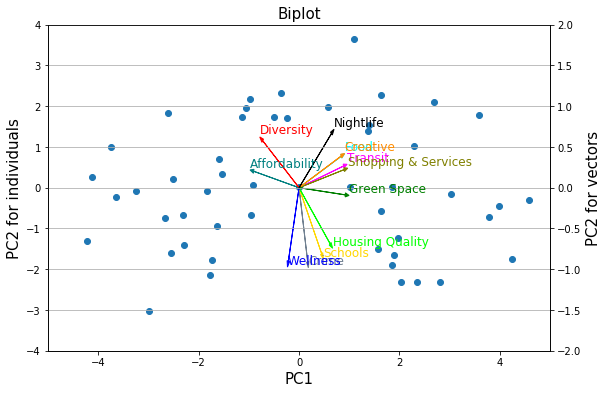

In [16]:
biplot(df_pca[:,0:2],np.transpose(pca.components_[0:2, :]),df_cols,4,2,5)


## Q3 Introducing outliers

In [17]:
data2=data.iloc[:,1:13]
cols=[]
for i in range(1,13):
    cols.append('PC{}'.format(i))
    
arr=[70, 70, 700, 80, 83, 71, 600, 70, 65, 900, 45, 800]
arr2=[77, 600, 72, 82, 800, 73, 65, 900, 62, 75, -500, 80]

df2 = {} 
for i in range(len(cols)):
    df2[df_cols[i]]=arr[i]
data2=data2.append(df2,ignore_index=True)
df2 = {} 
for i in range(len(cols)):
    df2[df_cols[i]]=arr2[i]
data2=data2.append(df2,ignore_index=True)
data3=data2
#NEW DATA
data2.tail()

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
47,89,71,64,67,62,71,76,67,60,70,73,65
48,90,63,66,75,65,66,79,63,67,65,74,65
49,76,78,73,62,70,63,75,75,73,75,71,79
50,70,70,700,80,83,71,600,70,65,900,45,800
51,77,600,72,82,800,73,65,900,62,75,-500,80


In [18]:
data2=pd.DataFrame(standardize(data2),columns=df_cols)
data2.tail()

,Affordability,Transit,Shopping & Services,Crime,Food,Schools,Diversity,Creative,Housing Quality,Green Space,Wellness,Nightlife
47,1.409283,-0.217176,-0.281329,-1.245156,-0.286991,-0.595087,-0.125056,-0.220247,-2.018903,-0.192766,0.118335,-0.254266
48,1.499311,-0.327622,-0.258071,-0.207110,-0.256903,-1.237090,-0.083636,-0.255514,-1.102593,-0.236885,0.130970,-0.254266
49,0.238920,-0.120535,-0.176669,-1.893934,-0.206757,-1.622291,-0.138863,-0.149714,-0.317184,-0.148647,0.093064,-0.113928
50,-0.301247,-0.230982,7.114616,0.441669,-0.076377,-0.595087,7.109603,-0.193797,-1.364396,7.130995,-0.235454,7.113466
51,0.328948,7.086096,-0.188298,0.701180,7.114589,-0.338286,-0.276929,7.124049,-1.757100,-0.148647,-7.121701,-0.103904


### Performing PCA Standardized data

In [19]:
pca2 = PCA(n_components=12)
pca2=pca2.fit(data2)
data_pca=pca2.transform(data2)
data_new=pca2.inverse_transform(data_pca)

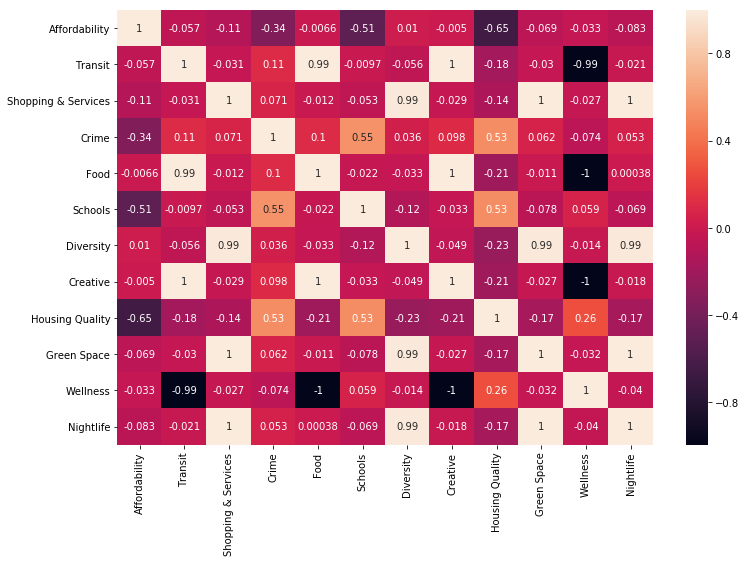

In [20]:
WW,VV= LA.eig(data2.corr())
plt.figure(figsize=[12,8])
sns.heatmap(data2.corr(),annot=True)

**We can see that the covariance matrix has changed completely due to the presence of outliers and standardization after that. This shows that there will be a significant change in the principal components analysis that we will carry out as the relationship/covariance of features have changed.**

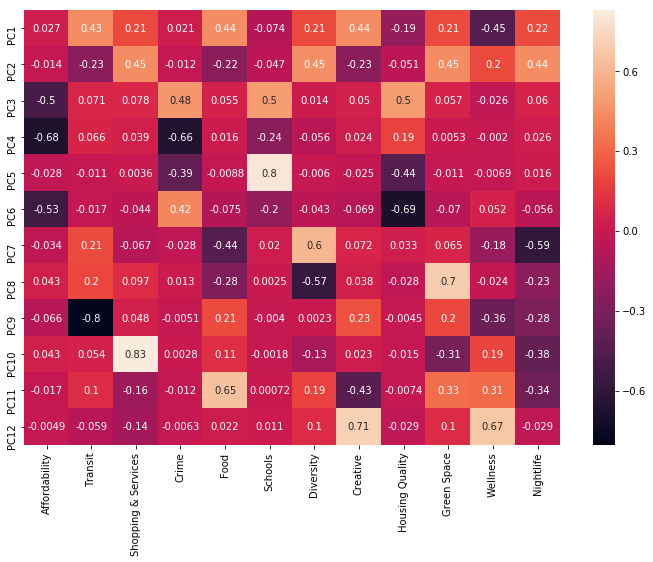

In [21]:
CC2=pd.DataFrame(pca2.components_,cols,df_cols)

plt.figure(figsize=[12,8])
sns.heatmap(CC2,annot=True)


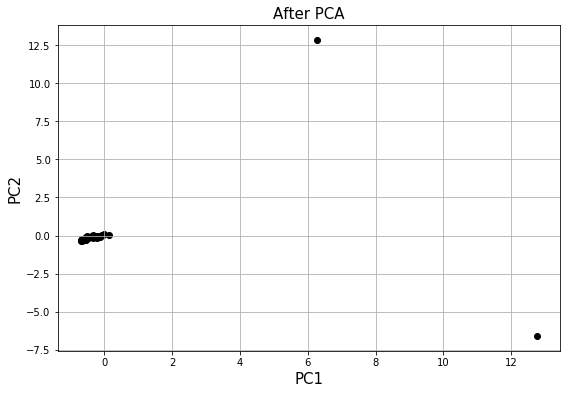

In [22]:
plt.figure(figsize=[9,6])
plt.scatter(data_pca[:,0], data_pca[:,1], c='k')
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title('After PCA',fontsize=15)
plt.grid(True)


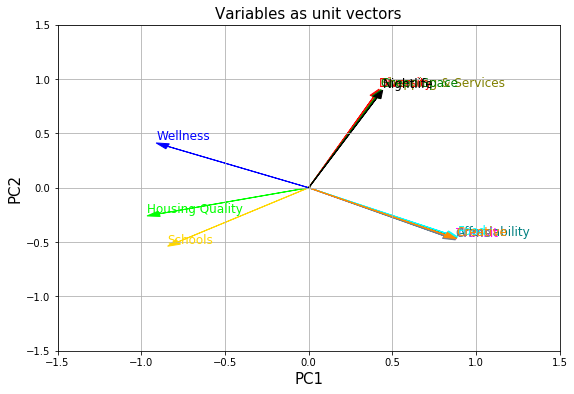

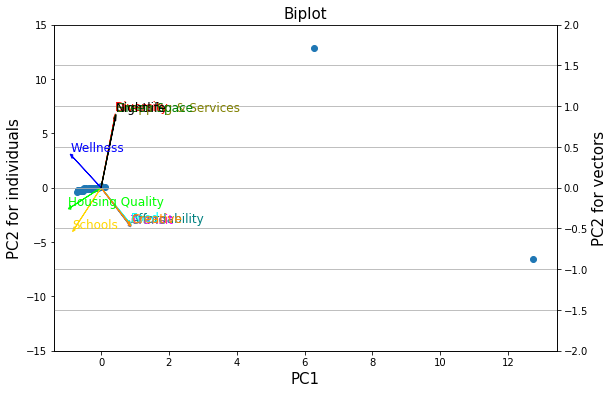

In [23]:
loading_plot(data_pca[:,0:2],np.transpose(pca2.components_[0:2, :]),df_cols)
biplot(data_pca[:,0:2],np.transpose(pca2.components_[0:2, :]),df_cols,15,2,None)


**We can see that due to the ouliers the exact scatter plot is not visible and the biplot fails to show how the vectors are aligned towards the observations. In order to better visualize this we can scale the scatter plot using minmax scalling**

## Scaled Biplot

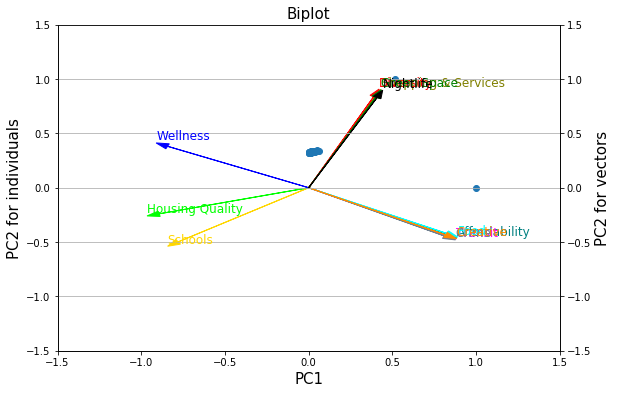

In [24]:
data_scaled=data_pca
data_scaled[:,0]=(data_pca[:,0]-data_pca[:,0].min())/(data_pca[:,0].max()-data_pca[:,0].min())
data_scaled[:,1]=(data_pca[:,1]-data_pca[:,1].min())/(data_pca[:,1].max()-data_pca[:,1].min())
biplot(data_scaled[:,0:2],np.transpose(pca2.components_[0:2, :]),df_cols,1.5,1.5,1.5)

**We can see that the scalling of scatter plot gave a better idea as to how the Principal components are changing to accomodate the outliers. The sifting of vectors to point towards the outlier around (0.5,1) in scaled plot shows this.**

### Performing PCA Unstandardized data

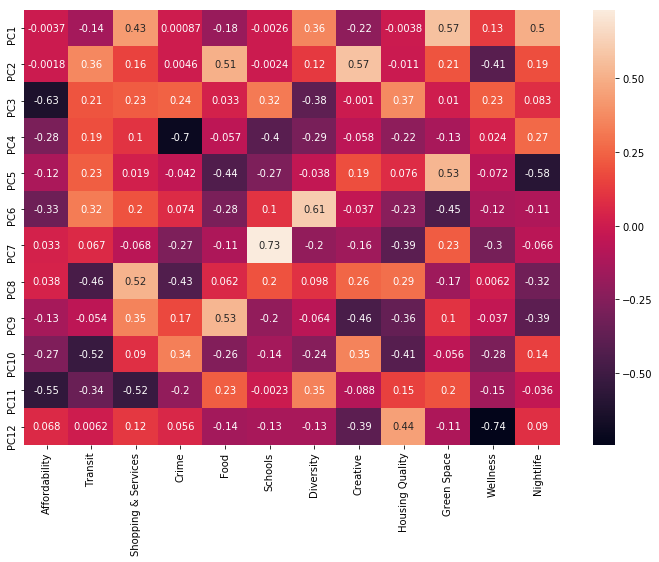

In [25]:
pca3 = PCA(n_components=12)
pca3=pca3.fit(data3)
data3_pca=pca3.transform(data3)
data3_new=pca3.inverse_transform(data3_pca)
WW,VV= LA.eig(data3.corr())

CC3=pd.DataFrame(pca3.components_,cols,df_cols)
plt.figure(figsize=[12,8])
sns.heatmap(CC3,annot=True)


**The plots for outliers show that the PCA is highly sensitive to outliers and by introducing a few extreme values can completely change the correlation between the features and hence the principal components also change.**

**The scaling/standardization also affects the Principal components as the variables are scaled wrt their individual mean and deviation from the mean. This is because the covariance matrix itself changes due to scaling/standardizing. Thus, we can say that any type of scaling or introduction of extreme data points will change the PCs.**